In [1]:
runs = ["training_function_28261_00000_0_method=batchbald,model=vduq_2021-05-14_03-07-38", "training_function_28261_00002_2_method=random,model=vduq_2021-05-14_03-07-38", 'training_function_28261_00001_1_method=entropy,model=vduq_2021-05-14_03-07-38', "training_function_28261_00003_3_method=bald,model=vduq_2021-05-14_03-07-38"]



In [1]:

import os
import glob
import pandas as pd

def get_subdirs(p):
    list_subfolders_with_paths = [f.path for f in os.scandir(p) if f.is_dir()]
    return list_subfolders_with_paths


runs = get_subdirs("/users/ug18jr/ray_results/training_function_2021-05-20_13-24-37")

In [2]:
runs

['/users/ug18jr/ray_results/training_function_2021-05-20_13-24-37/training_function_57be1_00000_0_method=batchbald,model=vduq_2021-05-20_13-24-37',
 '/users/ug18jr/ray_results/training_function_2021-05-20_13-24-37/training_function_57be1_00001_1_method=entropy,model=vduq_2021-05-20_13-24-37',
 '/users/ug18jr/ray_results/training_function_2021-05-20_13-24-37/training_function_57be1_00002_2_method=random,model=vduq_2021-05-20_13-24-37',
 '/users/ug18jr/ray_results/training_function_2021-05-20_13-24-37/training_function_57be1_00003_3_method=bald,model=vduq_2021-05-20_13-24-37',
 '/users/ug18jr/ray_results/training_function_2021-05-20_13-24-37/training_function_57be1_00004_4_method=batchbald,model=vduq_2021-05-20_15-06-31',
 '/users/ug18jr/ray_results/training_function_2021-05-20_13-24-37/training_function_57be1_00005_5_method=entropy,model=vduq_2021-05-20_15-29-15',
 '/users/ug18jr/ray_results/training_function_2021-05-20_13-24-37/training_function_57be1_00006_6_method=random,model=vduq_2

In [3]:
def generate_df_dicts(run_name):
    paths = get_subdirs(run_name)
    l = [s for s in paths]
    h = list(map(get_subdirs, l))
    h = [item for sublist in h for item in sublist]
    filenames = [ glob.glob(path + "/*.csv") for path in h ]
    filenames = [item for sublist in filenames for item in sublist]
    train = {}
    test = {}
    for filename in filenames:
        df = pd.read_csv(filename)
        fname = (filename.split("/")[-1]).split(".")[0]
        typing = fname.split("-")[0]
        idx = int(fname.split("-")[1])
        if typing == "train":
            train[idx] = df
        else:
            test[idx] = df
    return train, test

In [5]:
train, test = generate_df_dicts(runs[0])

In [6]:
print(test[32])

KeyError: 32

batchbald
entropy
random
bald


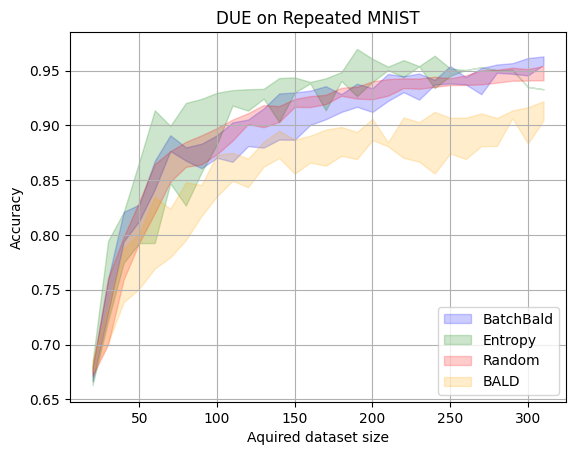

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import numpy as np

plt.style.use('default')

plt.title('DUE on Repeated MNIST')

colours = {
    "batchbald":"blue",
    "entropy": "green",
    "random":"red",
    "bald":"orange"
}
names = {
    "batchbald":"BatchBald",
    "entropy": "Entropy",
    "random":"Random",
    "bald":"BALD"
}


plt.xlabel("Aquired dataset size")
plt.ylabel("Accuracy")

results = {
    "batchbald":[ [] for i in range(30) ],
    "entropy": [ [] for i in range(30) ],
    "random":[ [] for i in range(30) ],
    "bald": [ [] for i in range(30) ]
}

for run in runs:
    strings = names.keys()
    run_type = list(filter( lambda x : ("=" + x) in run, strings))[0]

    train, test = generate_df_dicts(run)

    for i in range(0, 30):
        df = test.get(i, None)
        if df is None:
            break
        results[run_type][i].append(df['accuracy'].max())
x = []
for i in range(0, 30):
    x.append((10 * i) + 20)

mean_std = {}
patches = []
for name, result in results.items():
    print(name)
    mean = np.array([ np.mean(l) for l in result ])
    std =  np.array([ np.std(l) for l in result ])
    mean_std[name] = (mean, std)
    if name ==  "entropy":
    patches.append(mpatches.Patch(facecolor=colours[name], label=names[name]))
    plt.fill_between(x ,  mean-std ,mean+std, alpha=0.2, edgecolor='black', antialiased=True, color=colours[name], label=names[name], linewidth=1)

plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('science')

fig = plt.figure()
ax1 = fig.add_subplot(211)

ax1.set_title('vDUQ active learning')
ax1.set_ylabel('Accuracy')

df1 = pd.read_csv(run1)
df1['aquisition_size'] = (df1['Step']-1)*10 + 20
plt.plot(df1['aquisition_size'], df1['Value'], color='red')


df2 = pd.read_csv(run2)
df2['aquisition_size'] = (df1['Step']-1)*10 + 20
plt.plot(df2['aquisition_size'], df2['Value'], color='blue')

df3 = pd.read_csv(run3)
df3['aquisition_size'] = (df3['Step']-1)*10 + 20
plt.plot(df3['aquisition_size'], df3['Value'], color='green')

df4 = pd.read_csv(run4)
df4['aquisition_size'] = (df4['Step']-1)*10 + 20
plt.plot(df4['aquisition_size'], df4['Value'], color='orange')

plt.legend(["BatchBALD", "Joint Entropy", "Random", "BALD"])
plt.show()

In [ ]:
print(df1)

In [ ]:
import matplotlib.pyplot as plt

for folder in h:
    x = []
    y = []
    for i in range(0, 100):
        fname = folder + "/test-" + str(i) + ".csv"
        if not os.path.isfile(fname):
            break
        df = pd.read_csv(fname)
        x.append(20 + (i * 4))
        y.append(df['accuracy'].max())
    if "random" in folder:
       plt.plot(x, y, color='red')
       #pass
    else:
        #plt.plot(x, y, color='blue')
        pass